In [2]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/cleaned_resume.csv')

In [6]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b.e uit-rg...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    int64 
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.7+ KB


- Dataset is already cleaned.

In [8]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [9]:
all_resume_data = df['cleaned_resume'].values
len(all_resume_data[0].split())

501

In [10]:
# df[df['Category']==0]

In [11]:
df['Category'].unique()  # 25 classes

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [12]:
len(df['Category'].unique())

25

In [13]:
len(all_resume_data),type(all_resume_data)

(962, numpy.ndarray)

### Trying with TFIDF encoding from Tokenizer
- encoding is of shape 962 X 7570 , 7570 is very huge

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_resume_data)

print("The document count",tokenizer.document_count)
# print("The count of words",tokenizer.word_counts)

The document count 962


In [25]:
len(tokenizer.word_index),len(tokenizer.word_counts)

(7569, 7569)

In [26]:
encoded_data = tokenizer.texts_to_sequences(all_resume_data)

In [29]:
type(encoded_data),len(encoded_data),len(encoded_data[0])

(list, 962, 514)

In [30]:
list(encoded_data[0])[0:10]

[34, 231, 232, 62, 1697, 1085, 4389, 2347, 605, 2348]

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 1000
final_encoded_data = pad_sequences(encoded_data,padding="post",maxlen=max_seq_len)
final_encoded_data.shape

(962, 1000)

In [37]:
final_encoded_data[0]

array([  34,  231,  232,   62, 1697, 1085, 4389, 2347,  605, 2348,   23,
         27,  136,  139,  176,  172,  456, 2101, 2849, 3128, 2850, 2851,
       3622,  655, 6186, 6187,  740,  409,  113,  551, 4390, 1546,  113,
       2210,  438,  405, 4391, 2349, 1698, 1260, 4392, 4393, 6188, 1231,
       6189,   16, 4394,   72, 2102, 2852,  796, 6190, 4395,  439, 1790,
        439, 6191, 3304, 2348, 6192,  908, 1871,  692, 3305,  127,  196,
        521,   11, 6193, 6194,   62, 2350,  406, 3306,   92, 1280, 1072,
       2853,  215,  777,  172,   38,    6,    7,  111, 1904, 1791,    7,
        111, 1904, 1791, 4274, 3067, 1617,   24,    6,  136,    1,  168,
          4,  139,    1,  168,    4,   62,    1,  168,   53,    6,    2,
       4274, 3067, 1617,    5, 1618, 4396, 6195,   33, 1904,   74, 3129,
        185, 4397,   74, 3129,  185, 2581, 6196,  185,   43, 1099,  295,
        393,   42,  213,  817,   10, 4275,  121,  483,  185,  192,  243,
       3130, 1073,   75, 6197,  909,  243, 6198, 13

In [38]:
y = pd.get_dummies(df['Category']).values

In [39]:
y[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

In [79]:
from sklearn.model_selection import train_test_split

# Y = df['Category'].values
X = final_encoded_data
Y_onehot = pd.get_dummies(df['Category']).values

x_train,x_test,y_train,y_test = train_test_split(X,Y_onehot,random_state=123,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(769, 1000) (769, 25)
(193, 1000) (193, 25)


In [80]:
max_no_words = 10000
embd_dim = 100
max_seq_len = x_train.shape[1]

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [103]:
# model creation
model1 = Sequential([
    Embedding(max_no_words,embd_dim,input_length=max_seq_len),
    # LSTM(100,return_sequences=True),
    # LSTM(100),#,dropout=0.2),
    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(25,activation="softmax")
])
model1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 flatten_7 (Flatten)         (None, 100000)            0         
                                                                 
 dense_42 (Dense)            (None, 512)               51200512  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 128)             

In [104]:
epochs = 20
batch_size=256
# print(x_train.shape,y_train.shape)
history = model1.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/20
4/4 [==============================] - 2s 203ms/step - loss: 3.6102 - accuracy: 0.0858 - val_loss: 3.0231 - val_accuracy: 0.2539
Epoch 2/20
4/4 [==============================] - 0s 97ms/step - loss: 3.2022 - accuracy: 0.1651 - val_loss: 2.8811 - val_accuracy: 0.1917
Epoch 3/20
4/4 [==============================] - 0s 91ms/step - loss: 3.0267 - accuracy: 0.2302 - val_loss: 2.6229 - val_accuracy: 0.2124
Epoch 4/20
4/4 [==============================] - 0s 85ms/step - loss: 2.8113 - accuracy: 0.2536 - val_loss: 2.5176 - val_accuracy: 0.4197
Epoch 5/20
4/4 [==============================] - 0s 79ms/step - loss: 2.6364 - accuracy: 0.2692 - val_loss: 2.4410 - val_accuracy: 0.2332
Epoch 6/20
4/4 [==============================] - 0s 84ms/step - loss: 2.5354 - accuracy: 0.3368 - val_loss: 2.3043 - val_accuracy: 0.3472
Epoch 7/20
4/4 [==============================] - 0s 83ms/step - loss: 2.2634 - accuracy: 0.3654 - val_loss: 2.1539 - val_accuracy: 0.4404
Epoch 8/20
4/4 [==========

In [72]:
# print(X_test.shape)
# x_test = tf.sparse.reorder(X_test)
# x_test.shape

In [70]:
accr = model.evaluate(X_test,y_test)
accr

InvalidArgumentError: ignored

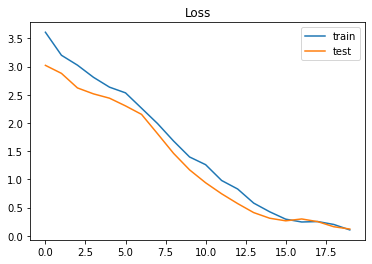

In [105]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [106]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

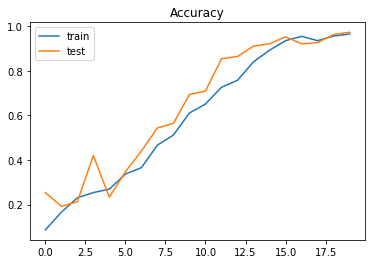

In [107]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [108]:
# testing
# test = 'rohan chaudhury 3645 wellborn rd bryan texas 77801 cid:131 979 985-8903 rohan.chaudhury.rc cid:239 linkedin.com/in/chaudhury-rohan github.com/rohan-chaudhury education texas a m university college station texas august 2021 may 2023 expected master science computer science graduate scholarship gpa first semester student national institute technology nit durgapur india august 2015 may 2019 bachelor technology electronics communication engineering cumulative gpa 9.25/10 courses machine learning software engineering pattern recognition deep learning algorithms data structures object oriented programming technical skills languages python c++ c java sql ruby bash html/css xml libraries tensorflow pytorch caffe keras scikit-learn opencv onnx pandas numpy selenium regex toolkits artificial intelligence model efficiency toolkit aimet snapdragon neural processing engine snpe sdk others linux git matlab jupyter notebook jira docker salesforce heroku google cloud platform aws work experience qualcomm india private ltd. november 2019 august 2021 associate software engineer artificial intelligence software team hyderabad india optimized various trained neural network models samsung oneplus oem customers utilizing model compression quantization fine-tuning techniques run models efficiently dsp cores snapdragon chipsets fixed several critical bugs snapdragon neural processing engine sdk enhance core features offers developed new recommendation system give suggestions similar salesforce issues raised customers past newly raised customer issues reported uracy 74 across various engineering divisions qualcomm developed widely used 150 internal users/month automation software automatically download selenium parse regex generate error logs reports device crash dumps sent customers salesforce identified fixed critical docker bokeh server documentation bugs aimet open-source qualcomm project technologies libraries python c++ snpe sdk qualcomm neural processing sdk aimet cuda salesforce tensorflow caffe pytorch onnx keras scikit-learn docker numpy pandas regex pricewaterhousecoopers pwc pvt ltd. internship may 2018 july 2018 technology consultant intern kolkata west bengal india developed ai chatbot using google dialogflow sap systems applications products data processing cloud platform send receive query data sap cloud database real-time documentation technologies libraries python javascript sap cloud platform sap hana cockpit google dialogflow academic personal projects academic projects python pytorch tensorflow numpy pandas javascript html 2021 designedanadaboostclassifierforfacedetectionusingviolajonesalgorithmwith97 uracy medium article code utilized 1 bayesian optimization hyper-parameter tuning train custom convolutional neural network 2 fine-tuning pre-trained resnet50 mobilenetv2 models facial expression recognition icml 2013 code estimated public speaking anxiety verbio dataset using 1 fnn trained features modified using filter wrapper category selection methods principal component analysis 2 rnn gru lstm networks poster code trained decision tree random forest adaboost regressor models predict hiring chances based job interviews code implemented k-nearest neighbour classifier cancer death risk prediction using haberman survival dataset code utilized k-means gaussian mixture models clustering countries based longitude latitude code designed linear regression model scratch prediction outcomes game setting code implemented enhanced javascript html content animations games texas a m vetmed website video personal projects python openai universe android studio unity c++ tensorflow selenium 2017 2020 fabricated reinforcement learning rl tutorial series demonstrate steps make ai game bot using rl developed rfid card based authentication system project using raspberry pi github link explanation video createdanaugmentedreality-basedandroid applicationinunitythatcanrenderanyvideooveranysurfaceonscreen developed ai chatbot android application using android studio google dialogflow github link developedsmart travel route finderapplicationinc++usingdijkstra salgorithmtogetoptimalroutebetweencities trained sentiment analysis model using tensorflow analyze positive/negative sentiments reviews github link developed demo web scraping pipeline using python selenium library dataset collection github link publications mahato s chaudhury r kar r mandal d saha s optimal integer order approximation fractional order human ear simulator ieee electrical engineering/electronics computer telecommunications information technology ecti-con- 2018 chiang rai thailand indexed scopus ieee xplore digital library'
test = 'himanshu bag cid:131 +91 8295990851 himanshubag12 cid:239 linkedin.com/in/himanshu-bag github.com/0x1h0b education national institute technology kurukshetra july 2016 may 2020 b.tech electronics communications engineering kurukshetra haryana cgpa 7.4/10 experience qualcomm india feb 2021 present associate software engineer hyderabad telangana part machine learning ce team works various ml driven tools used internally qualcomm engineers worked rasa framework build custom ner model identify different domain specific entities intents log files worked various custom automation scripts/tools work top ml models give inferences help assist ce engineers projects resume classification python sklearn streamlit nltk github-link a multi class text classification model given resume data input classify among 20 available class training dataset taken kaggle hosted webapp using streamlit user upload resume deployed heroku created word vectors using tf-idf method used multinomial naive babyes classification 98 uracy text summarizer python sklearn streamlit nltk created android application using java android studio calculate ticket prices trips museums nyc processed user inputted information back-end app return subtotal price based tickets selected utilized layout editor create ui application order allow different scenes interact transaction management gui java eclipse javafx designed sample banking transaction system using java simulate common functions using bank ount used javafx create gui supports actions creating ount deposit withdraw list acounts etc implementedobject-orientedprogrammingpracticessuchasinheritancetocreatedifferenta ounttypesanddatabases technical skills programming language python c++ libraries/frameworks numpy matplotlib pandas scikit-learn tensorflow pytorch other linux git oop data structure knowledge data science nlp deep learning ann rnn lstm cnn attention mechanism be certifications natural language processing specialization deeplearning.ai coursera online certificate-link completed non-credit specialization consisting 4 different courses covering classification vector spaces probabilistic model sequence attention models deep learning specialization deeplearning.ai coursera online certificate-link completed non-credit specialization consisting 5 different courses covering neural network rnn lstm transformer models learned hyper-parameter tuning optimization techniques along dropout batchnorm techniques data science python datacamp online certificate-link while competing course/track got familiar various data science libraries like numpy pandas matplotlib scikit-learn learned various data visualization analysis machine learning techniques'
test_enc = tokenizer.texts_to_sequences([test])
max_seq_len = 1000
test_full = pad_sequences(test_enc,padding="post",maxlen=max_seq_len)
test_full.shape

(1, 1000)

In [111]:
ans = model1.predict(test_full)
ans

array([[0.02567941, 0.0198575 , 0.002699  , 0.02128001, 0.00704991,
        0.06798635, 0.05848332, 0.17452052, 0.02220495, 0.01920332,
        0.01225805, 0.00908657, 0.02729916, 0.18041974, 0.18062003,
        0.0150943 , 0.00230846, 0.01421718, 0.00380358, 0.03070066,
        0.04400661, 0.00846809, 0.00371367, 0.02084152, 0.02819807]],
      dtype=float32)

In [112]:
#label encoder
import joblib
a = np.argmax(ans)
print(abs)
label_encoder = joblib.load('/content/output_label_encoder.pkl')
result = label_encoder.inverse_transform([a])
result

<built-in function abs>


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


array(['Health and fitness'], dtype=object)

### Trying with tfidf from sklearn

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

resume_data = df['cleaned_resume'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(resume_data)
word_features = word_vectorizer.transform(resume_data)


In [15]:
word_features.shape

(962, 1500)

In [16]:
x=word_features[0].toarray()
print(len(x[0]),list(x))

1500 [array([0.        , 0.        , 0.        , ..., 0.03101576, 0.        ,
       0.        ])]


In [17]:
resume_target = pd.get_dummies(df['Category']).values

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(word_features,resume_target,random_state=0, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(769, 1500) (769, 25)
(193, 1500) (193, 25)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [20]:
max_no_words = 7570
embd_dim = 100
max_seq_len = 1500

In [21]:
# model creation
model = Sequential([
    Embedding(max_no_words,embd_dim,input_length=max_seq_len),
    LSTM(100,dropout=0.2,return_sequences=True),
    LSTM(100,dropout=0.2),
    Dense(128,activation="relu"),
    # Dropuout(0.2),
    Dense(25,activation="softmax")
])
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 100)         757000    
                                                                 
 lstm (LSTM)                 (None, 1500, 100)         80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 933,953
Trainable params: 933,953
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
epochs = 50
batch_size=128
# print(x_train.shape,y_train.shape)
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test))

InvalidArgumentError: ignored